Design a grover search algorithm with oracle that would have 01 as search outcome.

In [83]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit import IBMQ, Aer, transpile, execute


Amplitude flip and amplification are the two key methods that would need to be done to acheive grovers search algorithm logic.

In orde to flip the state of 01 state of the complete state of 2 qubits. 

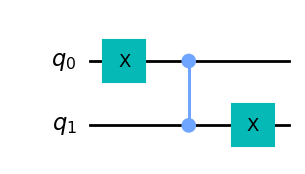

In [84]:
no_of_qubits = 2
no_of_search_space = 2**no_of_qubits

oracle = QuantumCircuit(no_of_qubits, name="oracle")
oracle.x(0)
oracle.cz(0,1)
oracle.x(1)
oracle.to_gate()

oracle.draw(output="mpl")

Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j],
            dims=(2, 2))


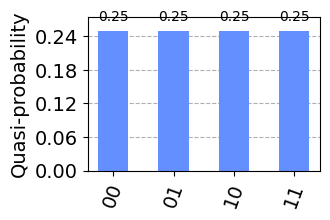

In [85]:
OracleTest = QuantumCircuit(2, name="OracleTest")
OracleTest.h([0, 1])
OracleTest.append(oracle, [0,1])

backend = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

OracleTest.save_statevector()   # Tell simulator to save statevector
result = backend.run(transpile(OracleTest, backend), shots=1000).result()
out_state = result.get_statevector()
np.around(out_state, 2)
print(out_state) # Display the output state vector
plot_histogram(result.get_counts(), figsize=(3,2))

Notice in the above state vector that the state has flipped for 01

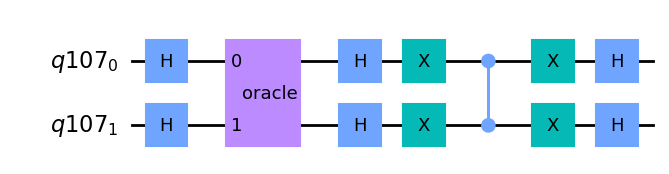

In [86]:
qreg = QuantumRegister(no_of_qubits)
creg = ClassicalRegister(no_of_qubits)
q = QuantumCircuit(qreg)

for i in range(no_of_qubits):
    q.h(i)

q.append(oracle, list(range(no_of_qubits)))

for i  in range(1):
    q.h(range(no_of_qubits))
    q.x(range(no_of_qubits))
    q.cz(1,0)
    q.x(range(no_of_qubits))
    q.h(range(no_of_qubits))

q.draw(output="mpl")

Statevector([-1.23259516e-32-6.12323400e-17j,
             -1.00000000e+00-1.83697020e-16j,
              1.57009246e-16+1.84889275e-32j,
             -2.22044605e-16-1.22464680e-16j],
            dims=(2, 2))


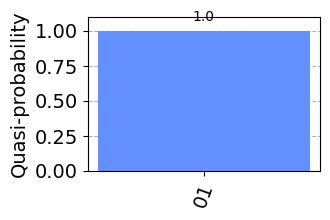

In [87]:
backend = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

q.save_statevector()   # Tell simulator to save statevector
result = backend.run(transpile(q, backend), shots=1000).result()
out_state = result.get_statevector()
np.around(out_state, 2)
print(out_state) # Display the output state vector
plot_histogram(result.get_counts(), figsize=(3,2))